<a href="https://colab.research.google.com/github/pullz6/Retail_Prediction/blob/main/Retail_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import opendatasets as od
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [3]:
od.download("https://www.kaggle.com/datasets/yasserh/walmart-dataset?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pulsaragunawardhana
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset


100%|██████████| 122k/122k [00:00<00:00, 31.9MB/s]

In [19]:
df=pd.read_csv("/content/walmart-dataset/Walmart.csv")

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
df.sort_values(by='Date',inplace=True)

In [11]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

def find_season(month):
        season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month.get(month)

season_list = []
for month in df['Month']:
    season = find_season(month)
    season_list.append(season)

df['Season'] = season_list

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Season        6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2), object(1)
memory usage: 553.0+ KB


Text(2.8194444444444517, 0.5, 'Weekly Sales')

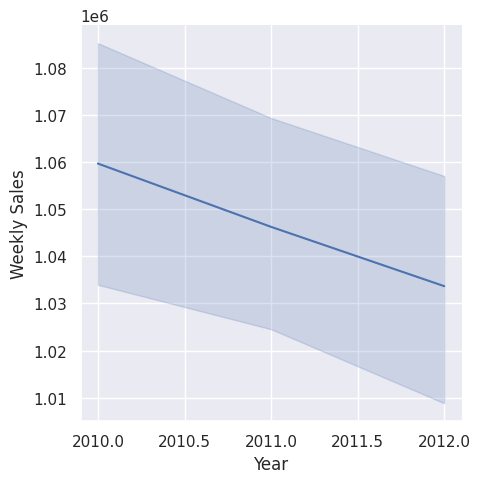

In [13]:
sns.relplot(data=df, x="Year", y="Weekly_Sales", kind="line")
plt.xlabel('Year')
plt.ylabel('Weekly Sales')

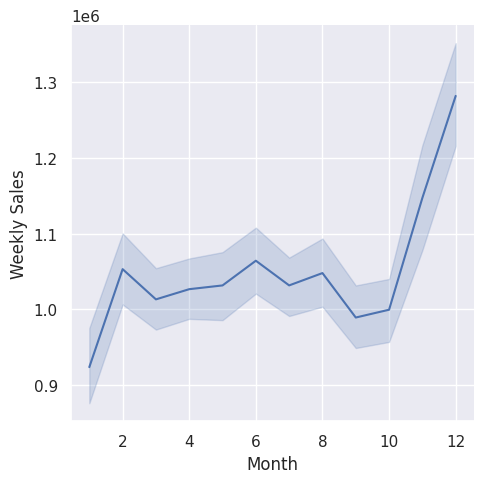

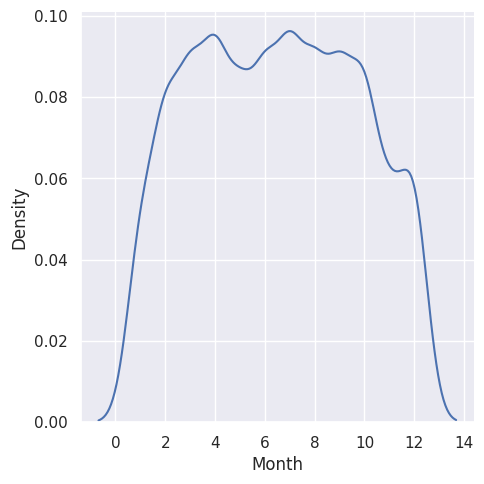

In [14]:
sns.relplot(data=df, x="Month", y="Weekly_Sales", kind="line")
plt.xlabel('Month')
plt.ylabel('Weekly Sales')

sns.displot(df, x="Month", kind="kde")

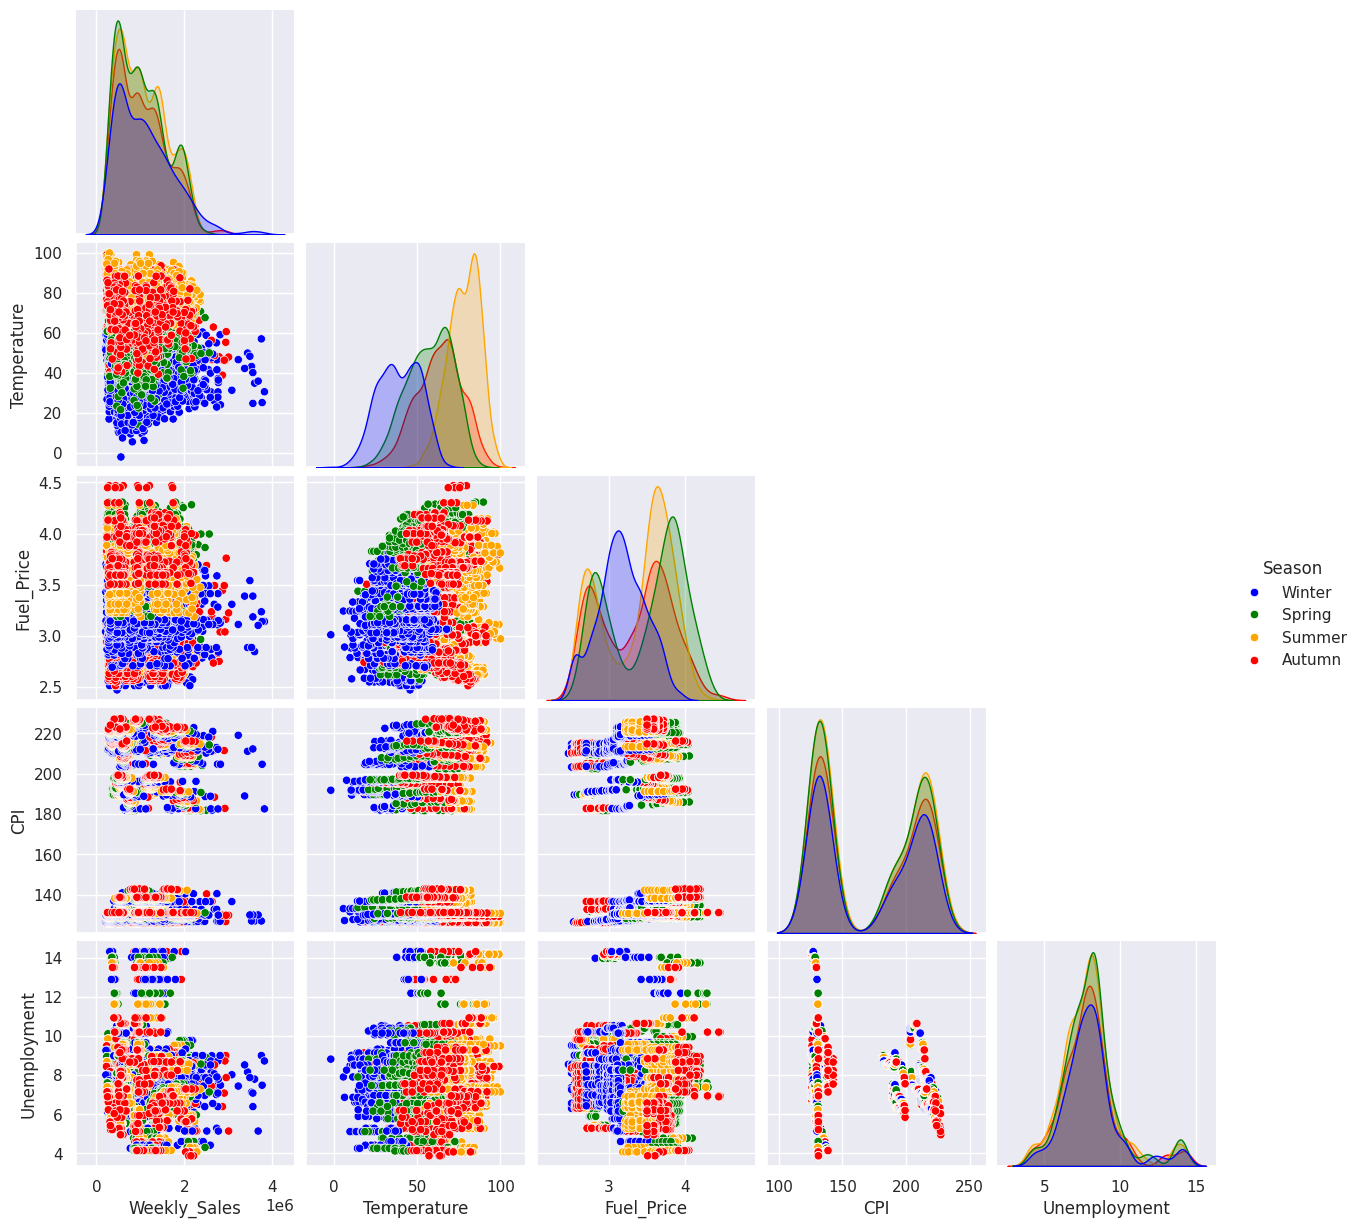

In [15]:
season_colors = {'Winter':'blue','Spring':'green','Summer':'orange','Autumn':'red'}
g = sns.pairplot(df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Season']],corner=True,hue='Season',palette=season_colors)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Season        6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2), object(1)
memory usage: 811.0+ KB


In [17]:
temp = df[['Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
temp.index = temp['Date']
temp = temp.to_period("M")

XGBoost

In [ ]:
# fit model
model = ARIMA(temp, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).